In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
seq = get_standardized_measures('results/sequential.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr.csv', excluded_columns=['P_DEGREE'])

In [4]:
data['TOTAL'] = data['TOTAL']

In [5]:
import matplotlib.pyplot as plt

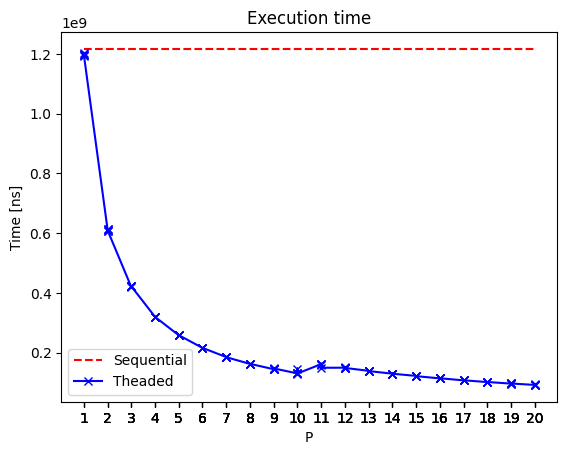

In [6]:
# setting up the plot
plt.title('Execution time')
plt.xticks(data['P_DEGREE'])
plt.xlabel("P")
plt.ylabel("Time [ns]")

# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [ ]:
speedup = [seq_time_tot / 